## Probability Based 

In [32]:
import pandas as pd
import re
import requests
import  matplotlib.pyplot  as plt

## ASCII

In [6]:
all_content = open('80k_articles.txt',encoding='UTF-8').read()

In [7]:
len(all_content)

34475997

In [8]:
all_content[:200]

'新华社照片，东莞（广东），2017年4月7日\\n（体育）（9）篮球——CBA总决赛第四场：广东对阵新疆\\n4月7日，广东东莞银行队球员易建联在比赛中扣篮。\\n当日，在2016-2017赛季中国男子篮球职业联赛（CBA）总决赛第四场比赛中，广东东莞银行队主场迎战新疆喀什古城队。\\n新华社记者孟永民摄\\n\u3000\u3000新华社北京４月１４日新媒体专电（记者杨烨）作为国民经济的重要支柱，央企一季度交上了一份漂亮的“'

In [23]:
def tokenize(string): 
    #return ''.join(re.findall('[\w|\d]+', string)) # 不太明白两种写法的区别，w也能匹配数字，但输出结果是有不同
    return ''.join(re.findall('\w+', string))

In [24]:
tokenize(all_content[:200])

'新华社照片东莞广东2017年4月7日n体育9篮球CBA总决赛第四场广东对阵新疆n4月7日广东东莞银行队球员易建联在比赛中扣篮n当日在20162017赛季中国男子篮球职业联赛CBA总决赛第四场比赛中广东东莞银行队主场迎战新疆喀什古城队n新华社记者孟永民摄n新华社北京４月１４日新媒体专电记者杨烨作为国民经济的重要支柱央企一季度交上了一份漂亮的'

In [25]:
ALL_CHARACTER = tokenize(all_content)
len(ALL_CHARACTER)

29733817

## Unigram

$P(W_oW_1W_2Wn) = P(W_o) \cdot P(W_1) \cdot P(W_2) \cdot P(W_n) $

In [28]:
from collections import Counter

In [29]:
all_character_counts = Counter(ALL_CHARACTER)

In [31]:
all_character_counts.most_common()[0:100]

[('的', 635684),
 ('n', 605563),
 ('国', 303683),
 ('1', 285430),
 ('在', 273451),
 ('一', 255874),
 ('中', 249541),
 ('日', 248419),
 ('2', 247140),
 ('新', 243975),
 ('0', 240159),
 ('年', 197627),
 ('月', 183696),
 ('人', 176780),
 ('大', 162508),
 ('社', 159861),
 ('华', 156763),
 ('是', 141034),
 ('和', 131350),
 ('赛', 130048),
 ('发', 129080),
 ('有', 128925),
 ('为', 126278),
 ('5', 124931),
 ('了', 124569),
 ('行', 122928),
 ('7', 121544),
 ('上', 118416),
 ('外', 117495),
 ('4', 112639),
 ('业', 112051),
 ('不', 112042),
 ('会', 109898),
 ('代', 100566),
 ('地', 96026),
 ('球', 92521),
 ('时', 92322),
 ('3', 92131),
 ('者', 91667),
 ('作', 91293),
 ('以', 91191),
 ('家', 89815),
 ('成', 89485),
 ('对', 87199),
 ('6', 86963),
 ('市', 85776),
 ('来', 85467),
 ('出', 85263),
 ('生', 84895),
 ('个', 83544),
 ('这', 81872),
 ('公', 81351),
 ('比', 80433),
 ('动', 80430),
 ('线', 80196),
 ('全', 79296),
 ('体', 79271),
 ('二', 79008),
 ('进', 78995),
 ('开', 78979),
 ('１', 78756),
 ('０', 75949),
 ('多', 75399),
 ('学', 73616),
 ('队',

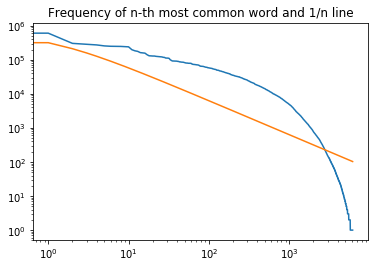

In [36]:
import  matplotlib.pyplot as plt
plt.xscale('log');plt.yscale('log');plt.title("Frequency of n-th most common word and 1/n line")
plt.plot([c for(w,c) in all_character_counts.most_common()])
M = all_character_counts.most_common()[0][1]
plt.plot([M/i for i in range(1,len(all_character_counts))])

In [59]:
def get_probability_from_counts(counts): # fast method
    total_occurences = sum(counts.values())
    def get_prob(char):
        occurence = counts.get(char,0) # D.get(k[,d]) -> D[k] if k in D, else d.  d defaults to None.
        return occurence/total_occurences
    return get_prob

get_char_prob = get_probability_from_counts(all_character_counts)

def get_char_prob_slow(char): # slow method
    total_occurences = sum(all_character_counts.values())
    return all_character_counts.get(char,0)/total_occurences
    


In [60]:
import time
def get_running_time(func,arg,times):
    start = time.time()
    for _ in range(times):
        func(arg)
    print('elapsed time for {} runs of {} is {} seconds'.format(times,func.__name__,time.time()-start))

In [61]:
get_running_time(get_char_prob,'神',10000)

elapsed time for 10000 runs of get_prob is 0.0059528350830078125 seconds


In [62]:
get_running_time(get_char_prob_slow,'神',10000)

elapsed time for 10000 runs of get_char_prob_slow is 0.6741960048675537 seconds


In [64]:
from functools import reduce
from operator import mul
def prob_of_string(string):
    return reduce(mul,[get_char_prob(char) for char in string])

In [67]:
prob_of_string('这是一个比较常见测试用例')

7.8149833542281e-36

In [68]:
prob_of_string('这是一个比较罕见测试用例')

3.6957089481504437e-37

In [89]:
print(prob_of_string('广州有一个地方叫做沥窖'))
print(prob_of_string('杭州有一个地方叫做西湖'))

1.2745292803369746e-36
2.0995356460752042e-33


In [90]:
pair = """前天晚上吃晚饭的时候
前天晚上吃早饭的时候""".split('\n')

pair2 = """正是一个好看的小猫
真是一个好看的小猫""".split('\n')

pair3 = """我无言以对，简直
我简直无言以对""".split('\n')

pairs = [pair, pair2, pair3]

In [91]:
def get_probability_prefromance(language_model_func, pairs):
    for (p1, p2) in pairs:
        print('*'*18)
        print('\t\t {} with probability {}'.format(p1, language_model_func(tokenize(p1)))) # tokenize去掉','这样的标点
        print('\t\t {} with probability {}'.format(p2, language_model_func(tokenize(p2))))

In [92]:
get_probability_prefromance(prob_of_string, pairs) # 3个结果都不合理

******************
		 前天晚上吃晚饭的时候 with probability 1.2207058723774045e-31
		 前天晚上吃早饭的时候 with probability 1.420433440421635e-31
******************
		 正是一个好看的小猫 with probability 3.2528612289150613e-25
		 真是一个好看的小猫 with probability 1.0220793879946632e-25
******************
		 我无言以对，简直 with probability 3.7425390630342124e-22
		 我简直无言以对 with probability 3.742539063034212e-22


## 2-Gram

$$ Pr(w_ow_1w_2...w_n) = Pr(w_1 | w_0) \cdot Pr(w_2 | w_1) ... \cdot Pr(w_n | w_{n-1})  $$

$$ Pr(w_1 | w_0) = \frac{Pr(w_1 w_0)}{Pr(w_0)} $$

In [87]:
gram_length = 2
two_gram_counts = Counter([ALL_CHARACTER[i:i+gram_length] for i in range(len(ALL_CHARACTER)-gram_length)])

In [88]:
two_gram_counts.most_common()[0:100]

[('新华', 135490),
 ('华社', 129104),
 ('20', 123427),
 ('nn', 118789),
 ('01', 102583),
 ('17', 81801),
 ('n新', 78433),
 ('中国', 77776),
 ('外代', 74795),
 ('7年', 59051),
 ('记者', 56946),
 ('二线', 55866),
 ('5月', 55491),
 ('代二', 55245),
 ('4月', 51236),
 ('日n', 48360),
 ('月1', 47181),
 ('照片', 46712),
 ('月2', 45268),
 ('社照', 45003),
 ('日在', 39495),
 ('国际', 38923),
 ('发展', 36410),
 ('00', 32399),
 ('国家', 31742),
 ('比赛', 29313),
 ('社记', 27920),
 ('北京', 27639),
 ('美国', 27622),
 ('企业', 27381),
 ('体育', 27169),
 ('赛中', 26877),
 ('公司', 26427),
 ('10', 25595),
 ('工作', 25311),
 ('经济', 25304),
 ('16', 25070),
 ('n当', 25000),
 ('当日', 24291),
 ('２０', 24199),
 ('合作', 23932),
 ('举行', 23906),
 ('进行', 23528),
 ('年5', 23416),
 ('n5', 23383),
 ('n4', 23273),
 ('市场', 22666),
 ('足球', 22606),
 ('一个', 22231),
 ('年4', 21904),
 ('世界', 20383),
 ('n外', 20336),
 ('表示', 20215),
 ('1日', 20099),
 ('服务', 20067),
 ('6月', 19602),
 ('政府', 19325),
 ('选手', 18663),
 ('n体', 18616),
 ('建设', 18606),
 ('代2', 18516),
 ('片外', 18512),
 ('

In [123]:
get_pair_prob = get_probability_from_counts(two_gram_counts)

def get_2_gram_prob(word,prev): # probability of seeing "word" given "prev"
    if get_pair_prob(prev+word) > 0:
        return get_pair_prob(prev+word)/get_char_prob(prev)
    else:
        return get_char_prob(word)

def get_2_gram_string_prob(string):
    probList = []
    for i,c in enumerate(string):
        prev = '<s>' if i == 0 else string[i-1]
        probList.append(get_2_gram_prob(c,prev))
    return reduce(mul,probList)

In [124]:
get_probability_prefromance(prob_of_string, pairs)

******************
		 前天晚上吃晚饭的时候 with probability 1.2207058723774045e-31
		 前天晚上吃早饭的时候 with probability 1.420433440421635e-31
******************
		 正是一个好看的小猫 with probability 3.2528612289150613e-25
		 真是一个好看的小猫 with probability 1.0220793879946632e-25
******************
		 我无言以对，简直 with probability 3.7425390630342124e-22
		 我简直无言以对 with probability 3.742539063034212e-22


In [125]:
get_probability_prefromance(get_2_gram_string_prob, pairs)

******************
		 前天晚上吃晚饭的时候 with probability 6.847690505341362e-20
		 前天晚上吃早饭的时候 with probability 1.7483929208056836e-19
******************
		 正是一个好看的小猫 with probability 1.313877986865493e-16
		 真是一个好看的小猫 with probability 8.984863857283642e-17
******************
		 我无言以对，简直 with probability 2.143887688284483e-17
		 我简直无言以对 with probability 2.0730979185519055e-17
